<a href="https://colab.research.google.com/github/Mafecedeno12/Taller-2-FC/blob/main/Finanzas_Comptacionales_Taller_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### UNIVERSIDAD EXTERNADO DE COLOMBIA
### FINANZAS COMPUTACIONALES
### TALLER 2
### MELANIE CANDIL, MARIA FERNANDA CEDEÑO Y ANA ACOSTA

In [ ]:
# Se importan las librerías
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
import pylab as py
from scipy.optimize import minimize
from scipy.optimize import linprog
from matplotlib.patches import Polygon
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog
import cvxpy as cp
from scipy import stats
%pip install yfinance
import yfinance as yf
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


 1. **Dibujar la región factible el siguiente problema de programación lineal (LP) con dos variables:**
$$ \max_{\{ x_1,x_2 \} } z =  2 x_1 - x_2 $$
$$ \text{s.t.}\ x_1 +  x_2 \geq 1 $$
$$  x_1 -  x_2 \leq 0 $$
$$ 3 x_1 +  x_2 \leq 6 $$
$$ x_1,\ x_2 \geq 0 $$



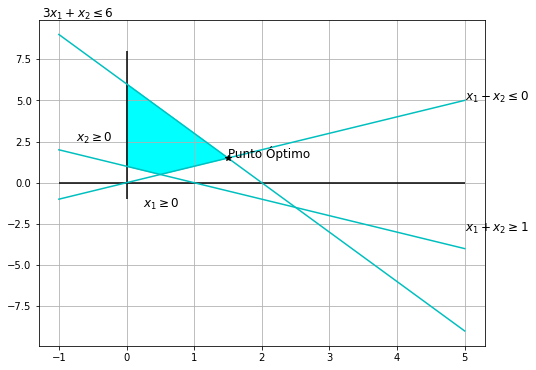

In [ ]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Dibujar lineas de restricción
ax.hlines(0, -1, 5)
ax.vlines(0, -1, 8)
ax.plot(np.linspace(-1, 5, 100), 1-1*np.linspace(-1, 5, 100), color="c")
ax.plot(np.linspace(-1, 5, 100), np.linspace(-1, 5, 100), color="c")
ax.plot(np.linspace(-1, 5, 100), 6-3*np.linspace(-1, 5, 100), color="c")
ax.text(5, -3, "$x_1 + x_2 \geq 1$", size=12)
ax.text(5, 5, "$x_1 - x_2 \leq 0$", size=12)
ax.text(-1.25, 10, "$3x_1 + x_2 \leq 6$", size=12)
ax.text(0.25, -1.5, "$x_1 \geq 0$", size=12) 
ax.text(-0.75, 2.5, "$x_2 \geq 0$", size=12) 

# Dibujar la región Factible
feasible_set = Polygon(np.array([[0, 1], 
                                 [0.5, 0.5], 
                                 [1.5, 1.5], 
                                 [0, 6]]), 
                       color="cyan")
ax.add_patch(feasible_set)


# Dibujar el punto óptimo
ax.plot(1.5, 1.5, "*", color="black")
ax.text(1.5, 1.5, "Punto Óptimo", size=12)

plt.show()


2.**Usted desea invertir la suma de $80 millones en cuatro fondos mutuos que tienen diferentes retornos esperados (E(R)), así como diferentes ponderaciones en acciones de capitalización grande, mediana y pequeña, como muestra la siguiente tabla**:

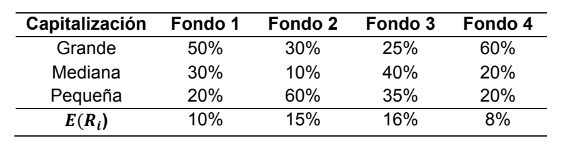

**La asignación anterior debe contener al menos un 35 % de acciones de gran capitalización, un 30% de mediana capitalización y un 15% de acciones de pequeña capitalización. Encuentre una asignación factible con el retorno esperado más alto, bajo el supuesto de que solo se le permite mantener posiciones largas en los fondos. Para ello, formule y resuelva el problema de programación lineal, bajo las siguientes restricciones**:

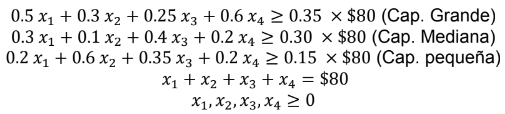

**Nota: resuelva el problema anterior usando las librerías de Linprog y CVXPY de Python.Además, construya un archivo de Excel para comparar los resultados**.

In [ ]:
#LINPROG
c = np.array([0.1,0.15,0.16,0.08])
A = np.array([[1,1,1,1]])
b = np.array([80])

D = np.array([[0.5,0.3,0.25,0.6],
              [0.3,0.1,0.4,0.2],
              [0.2,0.6,0.35,0.2]])
d = np.array([28,24,12])

resultado = linprog(-c,A_ub=-D,b_ub=-d,A_eq=A,b_eq=b, method='simplex')
resultado
#x.value

     con: array([0.])
     fun: -10.989473684210527
 message: 'Optimization terminated successfully.'
     nit: 7
   slack: array([-3.55271368e-15, -3.55271368e-15,  1.60000000e+01])
  status: 0
 success: True
       x: array([ 0.        , 12.63157895, 46.31578947, 21.05263158])

In [ ]:
#CVXPY
import cvxpy as cp
# Construct the problem.
n = 4
x = cp.Variable(n)

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b,D @ x >= d, x >=0 ]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
round(pd.DataFrame(x.value),4)

,0
0,0.0000
1,12.6316
2,46.3158
3,21.0526


Lasignación factible con el retorno esperado más alto, bajo el supuesto de que
solo se le permite mantener posiciones largas en los fondos es invertir 0 en el fondo 1, 12.6316 Millones en el fondo 2, 46.3158 Millones en el fondo 3 y 21.0526 Millones en el fondo 4.

3. **La empresa XYZ se enfrente al siguiente problema de financiación a corto plazo. Las
cifras están expresadas en millones** ($).

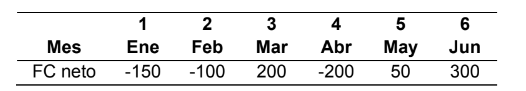

**Además, se sabe que la empresa cuenta con las siguientes fuentes de recursos**:
• **Una línea de crédito de hasta $100 a una tasa de interés del 1% mensual.
• Puede emitir papel comercial a 90 días con un interés total del 2% por un período de 3 meses.
• Todos los meses se pueden invertir los fondos sobrantes a una tasa de interés del 0,3% mensual. Por ejemplo, la empresa podría hacer un depósito bancario que le reconoce esa tasa.

Sobre este problema, la empresa desea saber si: ¿usar la línea de crédito en algunos de los
meses le representa un alto costo? si es así ¿cuándo debería usarla? ¿cuánto cuesta? ¿qué
pagos de intereses tendrá que hacer entre enero y junio? etc... Para responder a estos
interrogantes, la empresa puede formular y resolver un problema LP de forma rápida y
sencilla. Para la formulación del problema de LP, tenga en cuenta:
Variables:
xj: monto dispuesto a pedir en la línea de crédito en el mes j, para j = 1,2,3,4,5.
yj: monto emitido en el papel comercial en el mes j, para j = 1,2,3.
zj: exceso de fondos (FC) en el mes j, para j = 1,2,3,4,5,6.
Objetivo: Maximizar el exceso de fondos (FC) en el mes 6 (Jun):máx z6
Restricciones: Restricciones de saldo de caja en cada mes y límites en xj
, yj y z 
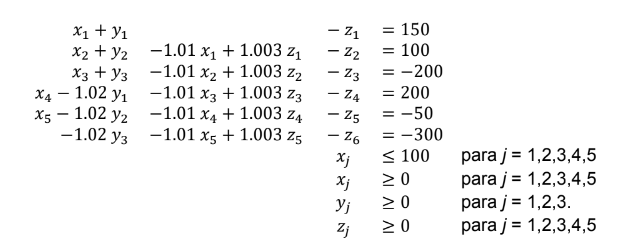



Nota: resuelva el problema anterior usando las librerías de Linprog y CVXPY de Python.
Además, construya un archivo de Excel para comparar los resultados.

In [ ]:
b = np.array([150, 100, -200, 200, -50, -300])
c = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Función objetivo
rx = np.array([1.01])  #tasa del crédito
ry = np.array([1.02]) #Tasa del bono
rz = np.array([1.003]) #Tasa excedente
A = np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
              [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
              [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
              [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
              [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
              [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]])

#Solución con cvxpy
n = len(c) # # de elementos que requiere el vector c
x = cp.Variable(n) #Mismo tamaño de c porque se debe operar x con c

objective = cp.Maximize(c.T @ x )
constraints = [A @ x == b, x>=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
sol = round(pd.DataFrame(x.value),6)
sol

,0
0,0.000001
1,42.686747
2,0.000000
3,0.000000
4,8.459517
5,150.000000
6,57.313253
7,195.057783
8,0.000001
9,0.000000


Se puede evidenciar que en el primer mes, con el fin de financarse la empresa tuvo que emitir bonos por 150, de igual manera en el segundo mes, por 	57.313253 y en el tercer mes por 195.057783. Se puede observar también que en el mes 1 hubo un excedente de 351.944169. De igual manera podemos evidenciar que la función objetivo de la empresa es de 92.496949




Con linprog


In [ ]:
c=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1]) #Retorno esperado 
rx= np.array([1.01])# Tasa interés crédito
ry= np.array([1.02])# Tasa interés bono
rz= np.array([1.003])# Tasa rentabilidad
A=np.array([[1,0,0,0,0, 1,0,0, -1,0,0,0,0,0],
            [-rx,1,0,0,0, 0,1,0, rz,-1,0,0,0,0],
            [0,-rx,1,0,0, 0,0,1, 0,rz,-1,0,0,0],
            [0,0,-rx,1,0, -ry,0,0, 0,0,rz,-1,0,0],
            [0,0,0,-rx,1, 0,-ry,0, 0,0,0,rz,-1,0],
            [0,0,0,0,-rx, 0,0,-ry, 0,0,0,0,rz,-1]]) 
b=np.array([150,100,-200,200,-50,-300])


resultado=linprog(-c,A_eq=A,b_eq=b,method='revised simplex') #c negativo por maximizar 
resultado

     con: array([ 2.84217094e-14, -1.42108547e-14, -5.68434189e-14,  2.84217094e-14,
        0.00000000e+00,  0.00000000e+00])
     fun: -92.49694915254233
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([  0.        ,  50.98039216,   0.        ,   0.        ,
         0.        , 150.        ,  49.01960784, 203.43436358,
         0.        ,   0.        , 351.9441675 ,   0.        ,
         0.        ,  92.49694915])

Al trabajar con lingprog, se evidencia que la copañía tuvo que obtener un crédito por 50.98039216. La empresa emitió bonos en el mes 1, 2 y 3 por 150, 49.01960784, 203.43436358 respectivamente.
De igual manera, se puede observar que en el mes 3 hubo un excedente de efectivo de 351.9441675. La función objetivo es la misma:  92.49694915.

Punto 4

In [ ]:
from numpy.core.fromnumeric import shape
## Estimaciones para fdx
# Información histórica para FDX
fechai = "2015-12-01"
fechaf = "2020-12-31"
periodicidad = "1Mo"
fdx = ["FDX"]
p_fdx = yf.download(fdx,start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_fdx = np.log(p_fdx/p_fdx.shift(1)).dropna()




indice = yf.download(["^GSPC","USO"],start=fechai,end=fechaf,interval=periodicidad)['Adj Close'].dropna()
r_indice = np.log(indice/indice.shift(1)).dropna()
r_indice.shape




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  2 of 2 completed


(60, 2)

In [ ]:
#la operación matricial igual a la operacion de los betas
t = len(r_indice)
unos = pd.DataFrame(np.repeat(1,t))
r_indice2 = pd.DataFrame(r_indice)
r_fdx2 = pd.DataFrame(r_fdx)
variables = np.concatenate((unos,r_indice2),1)
X = variables.T @ variables
Xy = variables.T @ r_fdx
Sol= np.linalg.solve(X,Xy)
Sol

array([-0.00329189,  0.00935156,  1.34792237])

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(pd.DataFrame(r_indice), pd.DataFrame(r_fdx))
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = [-0.00329189]
betas = [[0.00935156 1.34792237]]



Seleccionamos el activo Fedex (FDX),el indice Standar & Poor's 500
(GSPC) y United States Oil Fund, LP (USO) para realizar el ejercicio.
B= 0-1b = (x TX)
Podemos evidenciar que el alpha (retorno del activo) es negativo (-0.00329189), esto quiere decir que es menor de lo esperado, lo cual es bueno debido a que el activo tiene la oportunidad de crecer más.
Con respecto al riesgo, podemos ver que con respecto al Standar & Poor's 500, el Beta es  menor a 1 (0.00935156), lo cual nos indica que el activo no es agresivo, es decir que una variación del mercado provocará una variación menor a este activo. Esto significa que este activo varía menos que el mercado y por lo tanto tiene un menor riesgo sistemático. Por el contrario, frente a (USO) el Beta es mayor a 1( 1.34792237), lo cual indica que el activo es agresivo, es decir, una variación del mercado provoca una variación mayor a este en el activo. Lo anterior es favorable cuando el mercado está en etapa de crecimiento más no cuando está en etapa de recesión, es por esto que este actoivo tiene un mayor riesgo sistemático.


Punto 5

In [ ]:
b = np.array([100, 200, 800, 100, 800, 1200])
c = np.array([109, 94.8, 99.5, 93.1, 97.2, 92.9, 110, 104, 102, 95.2, 0, 0, 0, 0, 0, 0])
A = np.array([[10, 7, 8, 6, 7, 5, 10, 8,7,100, -1, 0, 0, 0, 0, 0],
              [10, 7, 8, 6, 7, 5, 10, 8, 7, 0, 1, -1, 0, 0, 0, 0],
              [10, 7, 8, 6, 7, 5, 110,108,0,0, 0, 1, -1, 0, 0, 0],
              [10, 7, 8, 6, 7, 105, 0, 0, 0,0, 0, 0, 1, -1, 0, 0],
              [10, 7, 8, 106, 107, 0, 0,0,0,0, 0, 0, 0, 1, -1, 0],
              [110, 107, 108, 0, 0, 0,0,0,0,0, 0, 0, 0, 0, 1, -1]])


#Solución con cvxpy
n = len(c) # # de elementos que requiere el vector c
x = cp.Variable(n) #Mismo tamaño de c porque se debe operar x con c

objective = cp.Minimize(c.T @ x )
constraints = [A @ x >= b, x>=0]
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
sol = round(pd.DataFrame(x.value),4)
sol

,0
0,0.0000
1,11.2150
2,0.0000
3,6.6338
4,0.0000
5,0.0000
6,0.0000
7,6.0087
8,-0.0000
9,0.0000


2 4 y 8

In [ ]:
result

2305.691648469554